In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [74]:
# read data
df = pd.read_csv('data/Data2.csv', sep=';', decimal=',', encoding='cp1252')

In [75]:
# Print rows
head_rows = 5
tail_rows = 6

h = df.head(5)
t = df.tail(6)

print('Head')
print(h)
print('Tail')
print(t)

Head
     Country Name                      Region  GDP per capita  Populatiion  \
0     Afghanistan                  South Asia      561.778746   34656032.0   
1         Albania       Europe & Central Asia     4124.982390    2876101.0   
2         Algeria  Middle East & North Africa     3916.881571   40606052.0   
3  American Samoa         East Asia & Pacific    11834.745230      55599.0   
4         Andorra       Europe & Central Asia    36988.622030      77281.0   

   CO2 emission       Area  
0      9809.225   652860.0  
1      5716.853    28750.0  
2    145400.217  2381740.0  
3           NaN      200.0  
4       462.042      470.0  
Tail
              Country Name                      Region  GDP per capita  \
211                Vietnam         East Asia & Pacific     2170.648054   
212  Virgin Islands (U.S.)   Latin America & Caribbean             NaN   
213     West Bank and Gaza  Middle East & North Africa     2943.404534   
214            Yemen, Rep.  Middle East & North Afr

# Based on what we see the dataset is not clean, which can lead to problems in the future.
So, we need to clean it up.

1. Fix the naming (spelling mistakes, etc.)
2. Check for undefined values
3. Replace those values with mean
4. Verify the data types
5. Convert invalid values (area and GDP per capita cannot be negative)

In [76]:
# fix the naming
df = df.rename(columns={'Country Name': 'Country', 'Populatiion': 'Population'})

In [77]:
# convert to float
df['GDP per capita'] = df['GDP per capita'].astype(str).replace(',', '.').astype(float)
df['CO2 emission'] = df['CO2 emission'].astype(str).replace(',', '.').astype(float)
df['Area'] = df['Area'].astype(str).replace(',', '.').astype(float)
df['Population'] = df['Population'].astype(str).replace(',', '.').astype(float)

In [78]:
# convert to absolute values, as area and GDP per capita cannot be negative
for col in df.columns:
    if df[col].dtype == float:
        df[col] = df[col].abs()

In [79]:
# Get rid of undefined values
df = df.fillna(df.mean(numeric_only=True))

# Verify that the data is normalized

array([[<Axes: title={'center': 'GDP per capita'}>,
        <Axes: title={'center': 'Population'}>],
       [<Axes: title={'center': 'CO2 emission'}>,
        <Axes: title={'center': 'Area'}>]], dtype=object)

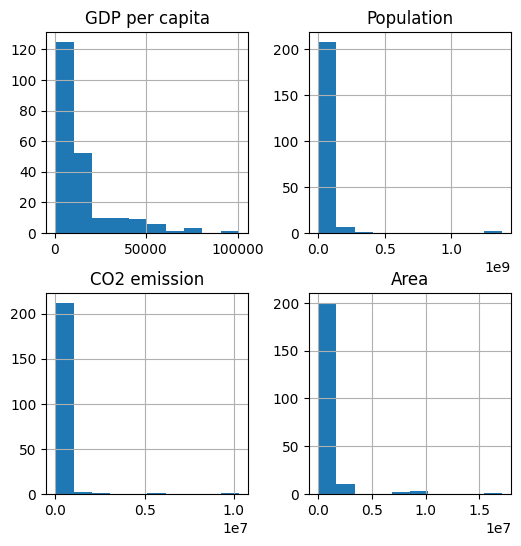

In [80]:
df.hist(figsize=(6, 6))

In [81]:
# based on the histogram, we can see that the data is not normalized. However, it would be better to verify it.

alpha = 0.05

# Shapiro-Wilk Test
for col in df.columns:
    if df[col].dtype == float:
        stats_per_col, p_per_col = stats.shapiro(df[col])
        print('Column name:', col)
        print(f'Stats: {round(stats_per_col, 5)}, p: {round(p_per_col, 5)}')

        if p_per_col > alpha:
            print('normal distribution')
        else:
            print('not normal distribution')
        print()


Column name: GDP per capita
Stats: 0.73067, p: 0.0
not normal distribution

Column name: Population
Stats: 0.2171, p: 0.0
not normal distribution

Column name: CO2 emission
Stats: 0.17369, p: 0.0
not normal distribution

Column name: Area
Stats: 0.33839, p: 0.0
not normal distribution



In [82]:
# let's check the hypothesis that the mean and median are the same

alpha = 0.05
area_stats, area_p = stats.ttest_1samp(df['Area'], df['Area'].median())

print('Area')
print(f'Stats: {round(area_stats, 5)}, p: {round(area_p, 5)}')
if area_p > alpha:
    print('equal')
else:
    print('different')

Area
Stats: 4.23766, p: 3e-05
different


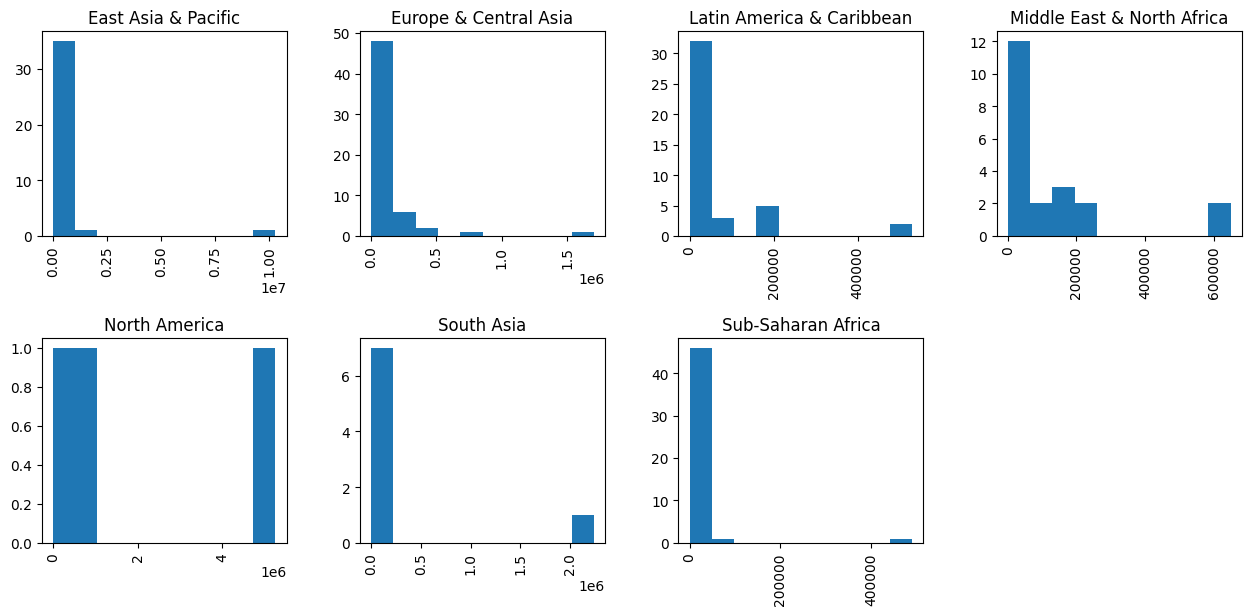

In [83]:
# region with co2 emission that is the closest to a normal distribution
df['CO2 emission'].hist(by=df['Region'], layout=(4, 4), figsize=(15, 15))
plt.show()

In [84]:
for region in df['Region'].unique():
    is_similar_region = df['Region'] == region
    stats_per_col, p_per_col = stats.shapiro(df[is_similar_region]['CO2 emission'])

    print('Region: ', region)
    if p_per_col > alpha:
        print('normally distributed')
    else:
        print('not normally distributed')
    print()

Region:  South Asia
not normally distributed

Region:  Europe & Central Asia
not normally distributed

Region:  Middle East & North Africa
not normally distributed

Region:  East Asia & Pacific
not normally distributed

Region:  Sub-Saharan Africa
not normally distributed

Region:  Latin America & Caribbean
not normally distributed

Region:  North America
normally distributed



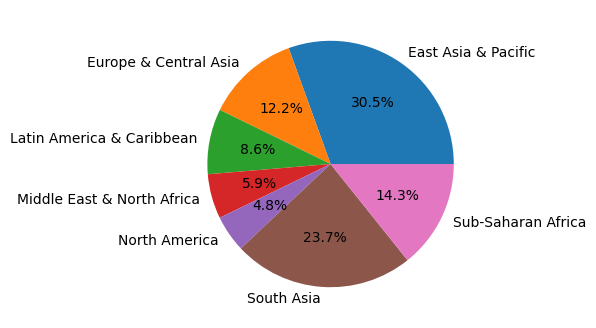

In [85]:
# pie chart with population per region

df.groupby('Region')['Population'].sum().plot(kind='pie', figsize=(4, 4), autopct='%1.1f%%')
plt.ylabel(None)
plt.show()